## Observations and Insights 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_research = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_research.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [90]:
# Checking the number of mice.
combined_research["Mouse ID"].nunique()


249

In [91]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_research[combined_research.duplicated(["Mouse ID","Timepoint"], keep="last")]
duplicated_mouseID = duplicate["Mouse ID"].values[0]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_research = combined_research[combined_research["Mouse ID"] != duplicated_mouseID]
clean_research


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [93]:
# Checking the number of mice in the clean DataFrame.
clean_research["Mouse ID"].nunique()

248

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({
    "Tumor Volume Mean/Average": mean, 
    "Tumor Volume Median": median, 
    "Tumor Volume Variance": variance, 
    "Tumor Volume Standard Deviation": std, 
    "Tumor Volume SEM": sem
})
summary_statistics


,Tumor Volume Mean/Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
combined_research.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean", "median", 'std', 'sem','var']})

Tumor Volume (mm3)                                          
                           mean     median       std       sem        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  0.329346  24.947764
Ceftamin              52.591172  51.776157  6.268188  0.469821  39.290177
Infubinol             52.884795  51.820584  6.567243  0.492236  43.128684
Ketapril              55.235638  53.698743  8.279709  0.603860  68.553577
Naftisol              54.331565  52.509285  8.134708  0.596466  66.173479
Placebo               54.033581  52.288934  7.821003  0.581331  61.168083
Propriva              52.322552  50.854632  6.507770  0.512884  42.351070
Ramicane              40.216745  40.673236  4.846308  0.320955  23.486704
Stelasyn              54.233149  52.431737  7.710419  0.573111  59.450562
Zoniferol             53.236507  51.818479  6.966589  0.516398  48.533355

## Bar and Pie Charts

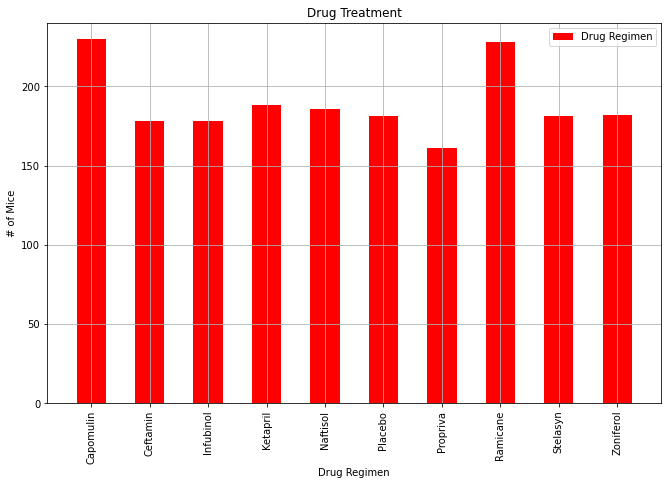

In [96]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Running groupby the 'Drug Regimen'
drug_regimen_group = combined_research.groupby("Drug Regimen")

# Counting the  data points for each drug regimen to create new DataFrame
count_of_drug_groups = pd.DataFrame(drug_regimen_group["Drug Regimen"].count())

# create bar chart to show mouse id and drug regimen
count_of_drug_groups.plot(kind="bar", facecolor="red", title="Drug Treatment", figsize=(11,7))
plt.ylabel("# of Mice")
plt.xlabel("Drug Regimen")
plt.grid()
plt.xlim(-0.75, len(count_of_drug_groups.index)-0.25)
plt.ylim(0, max( count_of_drug_groups["Drug Regimen"])+10)

plt.show()

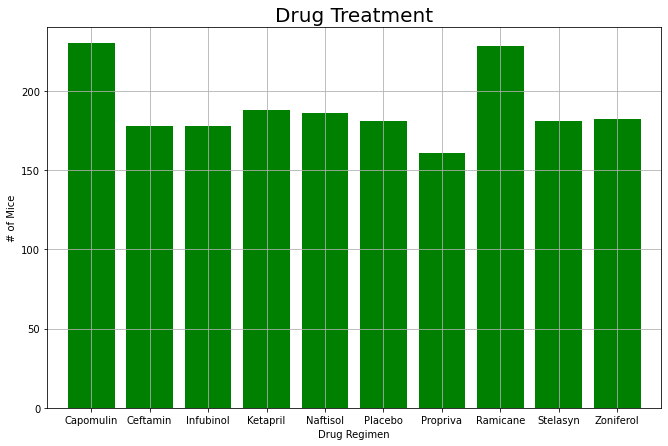

In [97]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig1, ax1 = plt.subplots(figsize=(11,7))
plt.bar(list(count_of_drug_groups.index), count_of_drug_groups["Drug Regimen"], facecolor = "green") 
plt.grid()
plt.xlim(-0.75, len(count_of_drug_groups.index)-0.25)
plt.ylim(0, max( count_of_drug_groups["Drug Regimen"])+10)
plt.title("Drug Treatment",fontsize = 20)
plt.ylabel("# of Mice")
plt.xlabel("Drug Regimen")

plt.show()


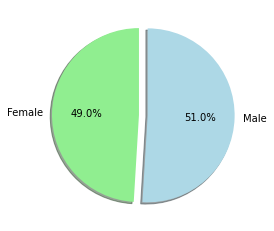

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(clean_research.groupby(["Sex"]).count()).reset_index()
gender_data = gender_data[["Sex", "Mouse ID"]]

colors = ["lightgreen", "lightblue"]
explode = (0, 0.1)

labels = gender_data["Sex"]
sizes = gender_data["Mouse ID"]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis = ("equal")
plt.show()



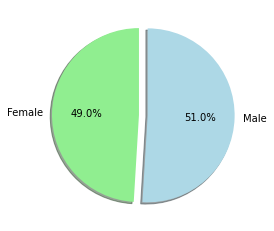

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis = ("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# ramicane, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= combined_research.groupby('Mouse ID').max()['Timepoint']
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_tumor_vol_df = pd.merge(last_timepoint_df, clean_research, on=("Mouse ID","Timepoint"))
last_tumor_vol_df




In [122]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
Capomulin_df = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"] == "Ceftamin", :]

capomulin_tumor_volume = Capomulin_df["Tumor Volume (mm3)"]
ramicane_tumor_volume = Ramicane_df["Tumor Volume (mm3)"]
infubinol_tumor_volume = Infubinol_df["Tumor Volume (mm3)"]
ceftamin_tumor_volume = Ceftamin_df["Tumor Volume (mm3)"]



    


In [124]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# CAPOMULIN
capomulin_quartiles = capomulin_tumor_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_IQR = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin is: {capomulin_IQR}")
print(f"The the median of Capomulin is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_IQR)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_IQR)

print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

outlier_capomulin = last_tumor_vol_df[(last_tumor_vol_df["Tumor Volume (mm3)"] < capomulin_lower_bound) | 
                                 (last_tumor_vol_df["Tumor Volume (mm3)"] > capomulin_upper_bound)]
outlier_capomulin                         


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [125]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# RAMICANE
ramicane_quartiles = ramicane_tumor_volume.quantile([.25,.5,.75])
ramicane_lowerq = capomulin_quartiles[0.25]
ramicane_upperq = capomulin_quartiles[0.75]
ramicane_IQR = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Ramicane is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {ramicane_IQR}")
print(f"The the median of Ramicane is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_IQR)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_IQR)

print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

outlier_ramicane = last_tumor_vol_df[(last_tumor_vol_df["Tumor Volume (mm3)"] < ramicane_lower_bound) | 
                                 (last_tumor_vol_df["Tumor Volume (mm3)"] > ramicane_upper_bound)]
outlier_ramicane                          


The lower quartile of Ramicane is: 32.37735684
The upper quartile of Ramicane is: 40.1592203
The interquartile range of Ramicane is: 7.781863460000004
The the median of Ramicane is: 36.56165229 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [127]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# INFUBINOL
infubinol_quartiles = infubinol_tumor_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_IQR = infubinol_upperq-infubinol_lowerq

print(f"The lower quartile of Infubinol is: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {infubinol_IQR}")
print(f"The the median of Infubinol is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_IQR)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_IQR)

print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

outlier_infubinol = last_tumor_vol_df[(last_tumor_vol_df["Tumor Volume (mm3)"] < infubinol_lower_bound) | 
                                 (last_tumor_vol_df["Tumor Volume (mm3)"] > infubinol_upper_bound)]
outlier_infubinol                          


The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
12,a644,45,Ramicane,Female,7,17,32.978522,1
31,c326,5,Infubinol,Female,18,25,36.321346,0
37,c758,45,Ramicane,Male,9,17,33.397653,1
61,f966,20,Capomulin,Male,16,17,30.485985,0
70,g791,45,Ramicane,Male,11,16,29.128472,1
76,i177,45,Ramicane,Male,10,18,33.562402,3
77,i334,45,Ramicane,Female,8,20,36.374510,2
91,j913,45,Ramicane,Female,4,17,31.560470,1
93,j989,45,Ramicane,Male,8,19,36.134852,1
96,k403,45,Ramicane,Male,21,16,22.050126,1


In [128]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# CEFTAMIN
ceftamin_quartiles = ceftamin_tumor_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_IQR = ceftamin_upperq-ceftamin_lowerq

print(f"The lower quartile of Ceftamin is: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {ceftamin_IQR}")
print(f"The the median of Ceftamin is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_IQR)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_IQR)

print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

outlier_ceftamin = last_tumor_vol_df[(last_tumor_vol_df["Tumor Volume (mm3)"] < ceftamin_lower_bound) | 
                                 (last_tumor_vol_df["Tumor Volume (mm3)"] > ceftamin_upper_bound)]
outlier_ceftamin                         


The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
96,k403,45,Ramicane,Male,21,16,22.050126,1
174,s185,45,Capomulin,Female,3,17,23.343598,1


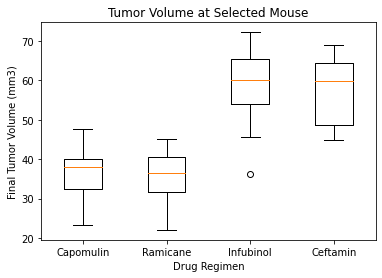

In [130]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [capomulin_tumor_volume, ramicane_tumor_volume, infubinol_tumor_volume, ceftamin_tumor_volume ]
plot_drug= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plot_data, labels=plot_drug)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

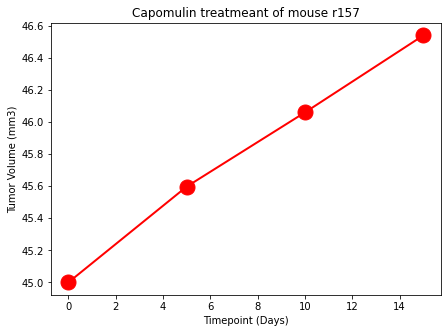

In [83]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_mouse_chart = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "r157",:]
capomulin_mouse_chart.head()
x_axis = capomulin_mouse_chart["Timepoint"]
tumsiz = capomulin_mouse_chart["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(7, 5))
plt.title('Capomulin treatmeant of mouse r157')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="red")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

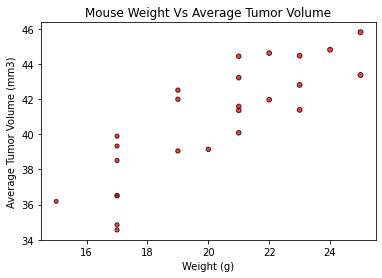

In [85]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_capm_volume =Capomulin_df.groupby(['Mouse ID']).mean()
plt.title('Mouse Weight Vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(avg_capm_volume['Weight (g)'],avg_capm_volume['Tumor Volume (mm3)'], marker = "o", facecolors = "red", edgecolors = "black", s=avg_capm_volume['Weight (g)'], alpha = 0.75)

## Correlation and Regression

In [107]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_tumor_avg = Capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
tumor_vol = capo_tumor_avg["Tumor Volume (mm3)"]
weight = capo_tumor_avg["Weight (g)"]
correlation = st.pearsonr(tumor_vol,weight)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.88


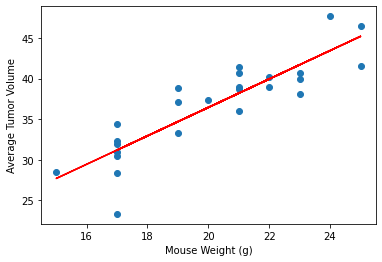

In [108]:
# Add the linear regression equation and line to plot
x_values = capo_tumor_avg['Weight (g)']
y_values = capo_tumor_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

